In [1]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 32.7 MB/s 
     |████████████████████████████████| 181 kB 56.8 MB/s 
     |████████████████████████████████| 157 kB 73.6 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 157 kB 78.6 MB/s 
     |████████████████████████████████| 157 kB 60.5 MB/s 
     |████████████████████████████████| 157 kB 71.5 MB/s 
     |████████████████████████████████| 157 kB 76.7 MB/s 
     |████████████████████████████████| 156 kB 79.2 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=798ade841dfc0fc58ca4237c0ec480b87063f0b8626af7a943fc6cd0475c22ca
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [4]:

df = pd.read_csv("/content/drive/MyDrive/data/KULLY/not_null_df.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99829 entries, 0 to 99828
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   99829 non-null  int64  
 1   item_id      99829 non-null  int64  
 2   brand_name   99829 non-null  object 
 3   category_id  99829 non-null  object 
 4   item_name    99829 non-null  object 
 5   price        99829 non-null  float64
 6   avg_rating   99829 non-null  float64
 7   user_id      99829 non-null  object 
 8   user_rating  99829 non-null  float64
 9   age_group    99829 non-null  float64
 10  gender       99829 non-null  object 
 11  skin_type    99829 non-null  object 
 12  skin_info    99829 non-null  object 
 13  review       99829 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 10.7+ MB


In [6]:
df = df.drop(['Unnamed: 0'],axis=1)

In [7]:
df.nunique()

item_id          397
brand_name        36
category_id        7
item_name        397
price            231
avg_rating         9
user_id        18499
user_rating        6
age_group          5
gender             2
skin_type          6
skin_info          8
review         87604
dtype: int64

In [8]:
del_index = df[df.skin_info=="복합성"].index
df = df.drop(index=del_index,axis=0)

In [9]:
df.skin_type.unique()

array(['건성', '지성', '중성', '수분부족지성', '복합성', '극건성'], dtype=object)

In [10]:
df.user_rating.unique()

array([5., 4., 0., 3., 1., 2.])

In [11]:
df.user_id.nunique()

18499

In [12]:
df.nunique()

item_id          397
brand_name        36
category_id        7
item_name        397
price            231
avg_rating         9
user_id        18499
user_rating        6
age_group          5
gender             2
skin_type          6
skin_info          7
review         87603
dtype: int64

In [13]:
# inference 할때 필요
user_to_replace_id = {original: idx for idx, original in enumerate(sorted(df.user_id.unique()))}
item_to_replace_id = {original: idx for idx, original in enumerate(sorted(df.item_id.unique()))}

In [14]:
df['user_replace_id'] = df['user_id'].map(lambda x:user_to_replace_id[x])

In [15]:
df['item_to_replace_id'] = df["item_id"].map(lambda x:item_to_replace_id[x])

In [16]:
df.head()

,item_id,brand_name,category_id,item_name,price,avg_rating,user_id,user_rating,age_group,gender,skin_type,skin_info,review,user_replace_id,item_to_replace_id
0,111650000195,한율,CTG002,자연을 닮은 립밤,4500.0,4.6,suma*******,5.0,5.0,여성,건성,민감성,"한율 자연을 닮은 립밤 흰감국을 구입했어요. 용량은 3.5g으로 종류가 다양한데요,...",15600,314
1,111650000195,한율,CTG002,자연을 닮은 립밤,4500.0,4.6,ssae****,5.0,5.0,여성,지성,모공,자초 컬러- 쌩얼에 자연스럽게 바르기 좋은 데일리 립밤이에요. 쿨톤인데도 자연스러워...,15332,314
2,111650000195,한율,CTG002,자연을 닮은 립밤,4500.0,4.6,suma*******,5.0,5.0,여성,건성,민감성,"한율 자연을 닮은 립밤을 쓰고 있어요.제가 선택한 제품은 흰감국인데요,무색의 립밤이...",15600,314
3,111650000195,한율,CTG002,자연을 닮은 립밤,4500.0,4.6,core****,4.0,4.0,여성,건성,민감성,여러 색상중에 선명한 색상을 선호해서 자초로 골랐어요. 개봉했을 때 쨍한 다홍레드...,2991,314
4,111650000195,한율,CTG002,자연을 닮은 립밤,4500.0,4.6,yuni***,5.0,3.0,여성,중성,탄력없음,립밤이나 립오일을 안바르면 한여름 빼곤 각질이 올라오거나 트는 편이라 립밤 쟁여놓고...,18195,314


In [17]:
user_replace_id_df = df['user_replace_id']
item_replace_id_df = df['item_to_replace_id']

In [18]:
len(user_replace_id_df.unique())

18499

In [19]:
df.head()

,item_id,brand_name,category_id,item_name,price,avg_rating,user_id,user_rating,age_group,gender,skin_type,skin_info,review,user_replace_id,item_to_replace_id
0,111650000195,한율,CTG002,자연을 닮은 립밤,4500.0,4.6,suma*******,5.0,5.0,여성,건성,민감성,"한율 자연을 닮은 립밤 흰감국을 구입했어요. 용량은 3.5g으로 종류가 다양한데요,...",15600,314
1,111650000195,한율,CTG002,자연을 닮은 립밤,4500.0,4.6,ssae****,5.0,5.0,여성,지성,모공,자초 컬러- 쌩얼에 자연스럽게 바르기 좋은 데일리 립밤이에요. 쿨톤인데도 자연스러워...,15332,314
2,111650000195,한율,CTG002,자연을 닮은 립밤,4500.0,4.6,suma*******,5.0,5.0,여성,건성,민감성,"한율 자연을 닮은 립밤을 쓰고 있어요.제가 선택한 제품은 흰감국인데요,무색의 립밤이...",15600,314
3,111650000195,한율,CTG002,자연을 닮은 립밤,4500.0,4.6,core****,4.0,4.0,여성,건성,민감성,여러 색상중에 선명한 색상을 선호해서 자초로 골랐어요. 개봉했을 때 쨍한 다홍레드...,2991,314
4,111650000195,한율,CTG002,자연을 닮은 립밤,4500.0,4.6,yuni***,5.0,3.0,여성,중성,탄력없음,립밤이나 립오일을 안바르면 한여름 빼곤 각질이 올라오거나 트는 편이라 립밤 쟁여놓고...,18195,314


In [20]:
type_list = df['skin_type'].unique() 
def change_nums(data):
  types = None

  if data == type_list[0]:
    types = 0
  if data == type_list[1]:
    types = 1
  if data == type_list[2]:
    types = 2
  if data == type_list[3]:
    types = 3
  if data == type_list[4]:
    types = 4
  if data == type_list[5]:
    types = 5
  
  return types


In [21]:
df['skin_type'].unique()

array(['건성', '지성', '중성', '수분부족지성', '복합성', '극건성'], dtype=object)

In [22]:
df['skin_type_nums'] = df['skin_type'].map(lambda x : change_nums(x))

In [23]:
df.head()

,item_id,brand_name,category_id,item_name,price,avg_rating,user_id,user_rating,age_group,gender,skin_type,skin_info,review,user_replace_id,item_to_replace_id,skin_type_nums
0,111650000195,한율,CTG002,자연을 닮은 립밤,4500.0,4.6,suma*******,5.0,5.0,여성,건성,민감성,"한율 자연을 닮은 립밤 흰감국을 구입했어요. 용량은 3.5g으로 종류가 다양한데요,...",15600,314,0
1,111650000195,한율,CTG002,자연을 닮은 립밤,4500.0,4.6,ssae****,5.0,5.0,여성,지성,모공,자초 컬러- 쌩얼에 자연스럽게 바르기 좋은 데일리 립밤이에요. 쿨톤인데도 자연스러워...,15332,314,1
2,111650000195,한율,CTG002,자연을 닮은 립밤,4500.0,4.6,suma*******,5.0,5.0,여성,건성,민감성,"한율 자연을 닮은 립밤을 쓰고 있어요.제가 선택한 제품은 흰감국인데요,무색의 립밤이...",15600,314,0
3,111650000195,한율,CTG002,자연을 닮은 립밤,4500.0,4.6,core****,4.0,4.0,여성,건성,민감성,여러 색상중에 선명한 색상을 선호해서 자초로 골랐어요. 개봉했을 때 쨍한 다홍레드...,2991,314,0
4,111650000195,한율,CTG002,자연을 닮은 립밤,4500.0,4.6,yuni***,5.0,3.0,여성,중성,탄력없음,립밤이나 립오일을 안바르면 한여름 빼곤 각질이 올라오거나 트는 편이라 립밤 쟁여놓고...,18195,314,2


In [24]:
df['skin_info'].unique() 

array(['민감성', '모공', '탄력없음', '칙칙함', '트러블', '건조함', '주름'], dtype=object)

In [25]:
type_list2 = df['skin_info'].unique() 
def change_nums(data):
  types = None

  if data == type_list2[0]:
    types = 0
  if data == type_list2[1]:
    types = 1
  if data == type_list2[2]:
    types = 2
  if data == type_list2[3]:
    types = 3
  if data == type_list2[4]:
    types = 4
  if data == type_list2[5]:
    types = 5
  if data == type_list2[6]:
    types = 6
  return types


In [26]:
df['skin_info_nums'] = df['skin_info'].map(lambda x : change_nums(x))

In [27]:
df['skin_info_nums']

0        0
1        1
2        0
3        0
4        2
        ..
99824    5
99825    5
99826    5
99827    4
99828    4
Name: skin_info_nums, Length: 99828, dtype: int64

In [28]:
df['gender'] = df['gender'].map(lambda x: 1 if x == '남성' else 0)

In [29]:
ratings = df['user_rating']

In [30]:
df['category_id'].unique()

array(['CTG002', 'CTG001', 'CTG004', 'CTG006', 'CTG007', 'CTG005',
       'CTG008'], dtype=object)

In [31]:
type_list3 =['CTG001','CTG002',  'CTG003', 'CTG004', 'CTG005', 'CTG006', 'CTG007',"CTG008"]
def change_nums(data):
  types = None

  if data == type_list3[0]:
    types = 0
  if data == type_list3[1]:
    types = 1
  if data == type_list3[2]:
    types = 2
  if data == type_list3[3]:
    types = 3
  if data == type_list3[4]:
    types = 4
  if data == type_list3[5]:
    types = 5
  if data == type_list3[6]:
    types = 6
  if data == type_list3[7]:
    types = 7
  return types

In [32]:
df['category_id_nums'] = df['category_id'].map(lambda x:change_nums(x))

In [33]:
x_data = df[[ 'age_group', 'gender', 'user_replace_id','item_to_replace_id', 'skin_type_nums', 'skin_info_nums','category_id_nums']]

In [34]:
ratings = df['user_rating']

In [35]:
last_dataset = pd.concat([x_data,ratings],axis=1)
last_dataset.to_csv("./last_dataset.csv",encoding="utf-8-sig")

In [36]:
# x_data, y_data

In [55]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adamax
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)
from tensorflow.keras.layers import Dense, Concatenate, Activation
import wandb
from wandb.keras import WandbCallback
wandb.init(project="kully4")



epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▆▇▇██▁▁▂▂▃▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▅▄▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▆▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mse,████████████████████▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▅▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▆▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mse,████████████████████▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
GFLOPs,0.00413
best_epoch,241
best_val_loss,0.22977
epoch,1
loss,76.03043
mse,0.30482


In [56]:
# train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_data, ratings, test_size=0.3, random_state=777, stratify=ratings) 

In [58]:
x_train.skin_info_nums.unique()

array([1, 0, 5, 3, 4, 6, 2])

In [59]:
x_train_skin_info = x_train['skin_info_nums'].to_numpy()
x_train_skin_type = x_train['skin_type_nums'].to_numpy()
x_train_age_group = x_train['age_group'].to_numpy()
x_train_user = x_train[["user_replace_id"]].to_numpy()
x_train_item = x_train[["item_to_replace_id"]].to_numpy()
x_train_gender = x_train[['gender']].to_numpy()
x_train_category = x_train[['category_id_nums']].to_numpy()

In [60]:
x_test_skin_info = x_test['skin_info_nums'].to_numpy()
x_test_skin_type = x_test['skin_type_nums'].to_numpy()
x_test_age_group = x_test['age_group'].to_numpy()
x_test_user = x_test[["user_replace_id"]].to_numpy()
x_test_item = x_test[["item_to_replace_id"]].to_numpy()
x_test_gender = x_test[['gender']].to_numpy()
x_test_category = x_test[['category_id_nums']].to_numpy()

In [61]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [62]:
# Variable 초기화 
K = 500                            # Latent factor 수 
mu = y_train.mean()    # 전체 평균 
M = x_data.user_replace_id.max() + 1       # Number of users
N = x_data.item_to_replace_id.max() + 1      # Number of movies

In [63]:
config = wandb.config
config.K = 500
config.first_layer = 2048
config.second_layer = 512
config.learn_rate = 0.005
config.epochs = 250

In [64]:
user = Input(shape=(1, )) # user_id
item = Input(shape=(1, )) # item_id
skin_type = Input(shape=(1, )) # skin_type 6
skin_info = Input(shape=(1, )) # skin_info 7
age_group = Input(shape=(1, )) # age 5
gender = Input(shape=(1, )) # gender 1
category = Input(shape=(1, )) # category 8

P_embedding = Embedding(M, K, embeddings_regularizer=l2())(user)
Q_embedding = Embedding(N, K, embeddings_regularizer=l2())(item)
user_bias = Embedding(M, 1, embeddings_regularizer=l2())(user)
item_bias = Embedding(N, 1, embeddings_regularizer=l2())(item)

skin_type_embedding = Embedding(6,100)(skin_type)
skin_info_embedding = Embedding(7,100)(skin_info)
age_group_embedding = Embedding(5,100)(age_group)
gender_embedding = Embedding(5,100)(gender)
category_embedding = Embedding(8,100)(category)

P_embedding = Flatten()(P_embedding)
Q_embedding = Flatten()(Q_embedding)
user_bias = Flatten()(user_bias)
item_bias = Flatten()(item_bias)

skin_type_layer = Flatten()(skin_type_embedding)
skin_info_layer = Flatten()(skin_info_embedding)
age_group_layer = Flatten()(age_group_embedding)
gender_group_layer = Flatten()(gender_embedding)
category_group_layer = Flatten()(category_embedding)


R = Concatenate()([P_embedding, Q_embedding, user_bias, item_bias,skin_type_layer,skin_info_layer,age_group_layer,gender_group_layer,category_group_layer])
R = Dense(config.first_layer)(R)
R = Activation('relu')(R)
R = Dropout(0.2)(R)
R = Dense(config.second_layer)(R)
R = Activation('linear')(R)
R = Dropout(0.2)(R)
R = Dense(1)(R)
model = Model(inputs=[user, item, skin_type,skin_info,age_group,gender,category], outputs=R)

model.compile(
  loss="mse",
  optimizer=SGD(lr=config.learn_rate),
  # optimizer=Adamax(),
  metrics="mse"
)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_23 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_24 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_25 (InputLayer)          [(None, 1)]          0           []                               
                                                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [65]:
result = model.fit(
  x=[x_train_user,x_train_item,x_train_skin_type,x_train_skin_info,x_train_age_group,x_train_gender,x_train_category],
  y=y_train,
  epochs=config.epochs,
  batch_size=512,
  validation_data=(
    [x_test_user,x_test_item,x_test_skin_type,x_test_skin_info,x_test_age_group,x_test_gender,x_test_category],
    y_test),
    callbacks=[WandbCallback()]
)

Epoch 1/250
  5/137 [>.............................] - ETA: 1s - loss: 98.0206 - mse: 19.1248   

132/137 [===========================>..] - ETA: 0s - loss: 79.5184 - mse: 1.6154

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 7s 44ms/step - loss: 79.4416 - mse: 1.5733 - val_loss: 77.0832 - val_mse: 0.2885
Epoch 2/250
134/137 [============================>.] - ETA: 0s - loss: 76.0876 - mse: 0.3053

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 76.0684 - mse: 0.3049 - val_loss: 74.9968 - val_mse: 0.2778
Epoch 3/250
133/137 [============================>.] - ETA: 0s - loss: 74.0400 - mse: 0.2987

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 34ms/step - loss: 74.0131 - mse: 0.2974 - val_loss: 72.9735 - val_mse: 0.2742
Epoch 4/250
135/137 [============================>.] - ETA: 0s - loss: 72.0295 - mse: 0.2957

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 33ms/step - loss: 72.0189 - mse: 0.2958 - val_loss: 71.0067 - val_mse: 0.2724
Epoch 5/250
134/137 [============================>.] - ETA: 0s - loss: 70.0955 - mse: 0.2938

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 33ms/step - loss: 70.0786 - mse: 0.2941 - val_loss: 69.0937 - val_mse: 0.2714
Epoch 6/250
133/137 [============================>.] - ETA: 0s - loss: 68.2144 - mse: 0.2927

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 34ms/step - loss: 68.1905 - mse: 0.2923 - val_loss: 67.2327 - val_mse: 0.2707
Epoch 7/250
134/137 [============================>.] - ETA: 0s - loss: 66.3716 - mse: 0.2924

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 66.3553 - mse: 0.2924 - val_loss: 65.4225 - val_mse: 0.2705
Epoch 8/250
134/137 [============================>.] - ETA: 0s - loss: 64.5841 - mse: 0.2910

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 64.5680 - mse: 0.2907 - val_loss: 63.6607 - val_mse: 0.2697
Epoch 9/250
136/137 [============================>.] - ETA: 0s - loss: 62.8329 - mse: 0.2901

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 62.8299 - mse: 0.2900 - val_loss: 61.9469 - val_mse: 0.2693
Epoch 10/250
134/137 [============================>.] - ETA: 0s - loss: 61.1539 - mse: 0.2895

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 33ms/step - loss: 61.1392 - mse: 0.2897 - val_loss: 60.2796 - val_mse: 0.2692
Epoch 11/250
136/137 [============================>.] - ETA: 0s - loss: 59.4964 - mse: 0.2888

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 59.4932 - mse: 0.2885 - val_loss: 58.6571 - val_mse: 0.2687
Epoch 12/250
135/137 [============================>.] - ETA: 0s - loss: 57.9017 - mse: 0.2888

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 57.8929 - mse: 0.2885 - val_loss: 57.0785 - val_mse: 0.2683
Epoch 13/250
135/137 [============================>.] - ETA: 0s - loss: 56.3431 - mse: 0.2874

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 56.3349 - mse: 0.2875 - val_loss: 55.5436 - val_mse: 0.2689
Epoch 14/250
136/137 [============================>.] - ETA: 0s - loss: 54.8215 - mse: 0.2864

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 54.8187 - mse: 0.2862 - val_loss: 54.0485 - val_mse: 0.2679
Epoch 15/250
137/137 [==============================] - ETA: 0s - loss: 53.3441 - mse: 0.2856

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.7s


137/137 [==============================] - 5s 37ms/step - loss: 53.3441 - mse: 0.2856 - val_loss: 52.5948 - val_mse: 0.2678
Epoch 16/250
137/137 [==============================] - ETA: 0s - loss: 51.9110 - mse: 0.2867

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 51.9110 - mse: 0.2867 - val_loss: 51.1801 - val_mse: 0.2674
Epoch 17/250
132/137 [===========================>..] - ETA: 0s - loss: 50.5386 - mse: 0.2872

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 50.5151 - mse: 0.2861 - val_loss: 49.8038 - val_mse: 0.2673
Epoch 18/250
137/137 [==============================] - ETA: 0s - loss: 49.1557 - mse: 0.2844

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 49.1557 - mse: 0.2844 - val_loss: 48.4647 - val_mse: 0.2671
Epoch 19/250
133/137 [============================>.] - ETA: 0s - loss: 47.8523 - mse: 0.2853

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 47.8357 - mse: 0.2852 - val_loss: 47.1618 - val_mse: 0.2669
Epoch 20/250
135/137 [============================>.] - ETA: 0s - loss: 46.5548 - mse: 0.2828

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 35ms/step - loss: 46.5487 - mse: 0.2836 - val_loss: 45.8945 - val_mse: 0.2671
Epoch 21/250
137/137 [==============================] - ETA: 0s - loss: 45.2996 - mse: 0.2849

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 33ms/step - loss: 45.2996 - mse: 0.2849 - val_loss: 44.6608 - val_mse: 0.2667
Epoch 22/250
135/137 [============================>.] - ETA: 0s - loss: 44.0870 - mse: 0.2825

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 44.0807 - mse: 0.2827 - val_loss: 43.4606 - val_mse: 0.2665
Epoch 23/250
137/137 [==============================] - ETA: 0s - loss: 42.8976 - mse: 0.2834

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 42.8976 - mse: 0.2834 - val_loss: 42.2933 - val_mse: 0.2666
Epoch 24/250
135/137 [============================>.] - ETA: 0s - loss: 41.7506 - mse: 0.2820

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 33ms/step - loss: 41.7448 - mse: 0.2824 - val_loss: 41.1572 - val_mse: 0.2664
Epoch 25/250
136/137 [============================>.] - ETA: 0s - loss: 40.6265 - mse: 0.2828

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 40.6242 - mse: 0.2825 - val_loss: 40.0516 - val_mse: 0.2661
Epoch 26/250
133/137 [============================>.] - ETA: 0s - loss: 39.5474 - mse: 0.2824

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 6s 41ms/step - loss: 39.5347 - mse: 0.2833 - val_loss: 38.9762 - val_mse: 0.2660
Epoch 27/250
132/137 [===========================>..] - ETA: 0s - loss: 38.4883 - mse: 0.2808

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 38.4717 - mse: 0.2812 - val_loss: 37.9298 - val_mse: 0.2658
Epoch 28/250
134/137 [============================>.] - ETA: 0s - loss: 37.4490 - mse: 0.2816

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 37.4405 - mse: 0.2822 - val_loss: 36.9117 - val_mse: 0.2658
Epoch 29/250
134/137 [============================>.] - ETA: 0s - loss: 36.4440 - mse: 0.2811

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 36.4345 - mse: 0.2806 - val_loss: 35.9211 - val_mse: 0.2656
Epoch 30/250
132/137 [===========================>..] - ETA: 0s - loss: 35.4726 - mse: 0.2801

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 35.4569 - mse: 0.2801 - val_loss: 34.9573 - val_mse: 0.2655
Epoch 31/250
133/137 [============================>.] - ETA: 0s - loss: 34.5193 - mse: 0.2815

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 35ms/step - loss: 34.5063 - mse: 0.2803 - val_loss: 34.0196 - val_mse: 0.2654
Epoch 32/250
134/137 [============================>.] - ETA: 0s - loss: 33.5880 - mse: 0.2788

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 33ms/step - loss: 33.5805 - mse: 0.2796 - val_loss: 33.1071 - val_mse: 0.2653
Epoch 33/250
136/137 [============================>.] - ETA: 0s - loss: 32.6817 - mse: 0.2792

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 32.6802 - mse: 0.2793 - val_loss: 32.2196 - val_mse: 0.2654
Epoch 34/250
134/137 [============================>.] - ETA: 0s - loss: 31.8112 - mse: 0.2782

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 31.8035 - mse: 0.2783 - val_loss: 31.3558 - val_mse: 0.2652
Epoch 35/250
135/137 [============================>.] - ETA: 0s - loss: 30.9562 - mse: 0.2785

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 30.9524 - mse: 0.2792 - val_loss: 30.5153 - val_mse: 0.2651
Epoch 36/250
134/137 [============================>.] - ETA: 0s - loss: 30.1306 - mse: 0.2791

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 30.1233 - mse: 0.2791 - val_loss: 29.6977 - val_mse: 0.2650
Epoch 37/250
137/137 [==============================] - ETA: 0s - loss: 29.3162 - mse: 0.2787

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 35ms/step - loss: 29.3162 - mse: 0.2787 - val_loss: 28.9019 - val_mse: 0.2647
Epoch 38/250
134/137 [============================>.] - ETA: 0s - loss: 28.5377 - mse: 0.2780

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 28.5311 - mse: 0.2784 - val_loss: 28.1279 - val_mse: 0.2647
Epoch 39/250
136/137 [============================>.] - ETA: 0s - loss: 27.7689 - mse: 0.2784

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 27.7676 - mse: 0.2784 - val_loss: 27.3750 - val_mse: 0.2648
Epoch 40/250
134/137 [============================>.] - ETA: 0s - loss: 27.0312 - mse: 0.2784

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 40ms/step - loss: 27.0241 - mse: 0.2779 - val_loss: 26.6420 - val_mse: 0.2645
Epoch 41/250
133/137 [============================>.] - ETA: 0s - loss: 26.3095 - mse: 0.2771

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 31ms/step - loss: 26.3007 - mse: 0.2774 - val_loss: 25.9289 - val_mse: 0.2644
Epoch 42/250
137/137 [==============================] - ETA: 0s - loss: 25.5966 - mse: 0.2766

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 25.5966 - mse: 0.2766 - val_loss: 25.2353 - val_mse: 0.2643
Epoch 43/250
137/137 [==============================] - ETA: 0s - loss: 24.9125 - mse: 0.2768

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 24.9125 - mse: 0.2768 - val_loss: 24.5604 - val_mse: 0.2643
Epoch 44/250
134/137 [============================>.] - ETA: 0s - loss: 24.2526 - mse: 0.2767

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 24.2465 - mse: 0.2766 - val_loss: 23.9035 - val_mse: 0.2641
Epoch 45/250
133/137 [============================>.] - ETA: 0s - loss: 23.6069 - mse: 0.2767

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 23.5988 - mse: 0.2767 - val_loss: 23.2646 - val_mse: 0.2640
Epoch 46/250
132/137 [===========================>..] - ETA: 0s - loss: 22.9783 - mse: 0.2764

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 22.9680 - mse: 0.2762 - val_loss: 22.6428 - val_mse: 0.2639
Epoch 47/250
132/137 [===========================>..] - ETA: 0s - loss: 22.3644 - mse: 0.2760

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 22.3550 - mse: 0.2765 - val_loss: 22.0381 - val_mse: 0.2639
Epoch 48/250
133/137 [============================>.] - ETA: 0s - loss: 21.7667 - mse: 0.2775

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 21.7582 - mse: 0.2763 - val_loss: 21.4495 - val_mse: 0.2638
Epoch 49/250
135/137 [============================>.] - ETA: 0s - loss: 21.1796 - mse: 0.2752

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 21.1770 - mse: 0.2757 - val_loss: 20.8767 - val_mse: 0.2636
Epoch 50/250
134/137 [============================>.] - ETA: 0s - loss: 20.6174 - mse: 0.2759

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 20.6123 - mse: 0.2759 - val_loss: 20.3195 - val_mse: 0.2635
Epoch 51/250
137/137 [==============================] - ETA: 0s - loss: 20.0619 - mse: 0.2751

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 20.0619 - mse: 0.2751 - val_loss: 19.7775 - val_mse: 0.2634
Epoch 52/250
134/137 [============================>.] - ETA: 0s - loss: 19.5319 - mse: 0.2751

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 19.5262 - mse: 0.2741 - val_loss: 19.2500 - val_mse: 0.2633
Epoch 53/250
136/137 [============================>.] - ETA: 0s - loss: 19.0076 - mse: 0.2749

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 19.0068 - mse: 0.2750 - val_loss: 18.7367 - val_mse: 0.2632
Epoch 54/250
136/137 [============================>.] - ETA: 0s - loss: 18.5012 - mse: 0.2748

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 35ms/step - loss: 18.5002 - mse: 0.2746 - val_loss: 18.2374 - val_mse: 0.2630
Epoch 55/250
135/137 [============================>.] - ETA: 0s - loss: 18.0114 - mse: 0.2758

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.7s


137/137 [==============================] - 5s 38ms/step - loss: 18.0080 - mse: 0.2749 - val_loss: 17.7518 - val_mse: 0.2632
Epoch 56/250
132/137 [===========================>..] - ETA: 0s - loss: 17.5359 - mse: 0.2744

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 17.5285 - mse: 0.2747 - val_loss: 17.2791 - val_mse: 0.2631
Epoch 57/250
137/137 [==============================] - ETA: 0s - loss: 17.0616 - mse: 0.2740

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 35ms/step - loss: 17.0616 - mse: 0.2740 - val_loss: 16.8190 - val_mse: 0.2628
Epoch 58/250
137/137 [==============================] - ETA: 0s - loss: 16.6078 - mse: 0.2739

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 16.6078 - mse: 0.2739 - val_loss: 16.3715 - val_mse: 0.2628
Epoch 59/250
134/137 [============================>.] - ETA: 0s - loss: 16.1696 - mse: 0.2731

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 32ms/step - loss: 16.1656 - mse: 0.2731 - val_loss: 15.9360 - val_mse: 0.2626
Epoch 60/250
137/137 [==============================] - ETA: 0s - loss: 15.7361 - mse: 0.2730

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 15.7361 - mse: 0.2730 - val_loss: 15.5123 - val_mse: 0.2624
Epoch 61/250
134/137 [============================>.] - ETA: 0s - loss: 15.3210 - mse: 0.2721

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 15.3177 - mse: 0.2725 - val_loss: 15.1001 - val_mse: 0.2623
Epoch 62/250
133/137 [============================>.] - ETA: 0s - loss: 14.9162 - mse: 0.2725

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 14.9111 - mse: 0.2725 - val_loss: 14.6991 - val_mse: 0.2622
Epoch 63/250
134/137 [============================>.] - ETA: 0s - loss: 14.5193 - mse: 0.2727

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 14.5161 - mse: 0.2730 - val_loss: 14.3089 - val_mse: 0.2621
Epoch 64/250
133/137 [============================>.] - ETA: 0s - loss: 14.1350 - mse: 0.2720

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 14.1305 - mse: 0.2723 - val_loss: 13.9291 - val_mse: 0.2620
Epoch 65/250
132/137 [===========================>..] - ETA: 0s - loss: 13.7630 - mse: 0.2733

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 35ms/step - loss: 13.7563 - mse: 0.2725 - val_loss: 13.5597 - val_mse: 0.2618
Epoch 66/250
132/137 [===========================>..] - ETA: 0s - loss: 13.3969 - mse: 0.2716

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 13.3906 - mse: 0.2712 - val_loss: 13.2003 - val_mse: 0.2617
Epoch 67/250
132/137 [===========================>..] - ETA: 0s - loss: 13.0441 - mse: 0.2735

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 33ms/step - loss: 13.0376 - mse: 0.2727 - val_loss: 12.8507 - val_mse: 0.2617
Epoch 68/250
135/137 [============================>.] - ETA: 0s - loss: 12.6930 - mse: 0.2712

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 12.6912 - mse: 0.2712 - val_loss: 12.5103 - val_mse: 0.2615
Epoch 69/250
132/137 [===========================>..] - ETA: 0s - loss: 12.3598 - mse: 0.2700

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 33ms/step - loss: 12.3554 - mse: 0.2710 - val_loss: 12.1795 - val_mse: 0.2616
Epoch 70/250
133/137 [============================>.] - ETA: 0s - loss: 12.0325 - mse: 0.2705

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 12.0291 - mse: 0.2712 - val_loss: 11.8572 - val_mse: 0.2614
Epoch 71/250
136/137 [============================>.] - ETA: 0s - loss: 11.7109 - mse: 0.2701

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 11.7105 - mse: 0.2703 - val_loss: 11.5437 - val_mse: 0.2611
Epoch 72/250
134/137 [============================>.] - ETA: 0s - loss: 11.4032 - mse: 0.2693

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 11.4013 - mse: 0.2702 - val_loss: 11.2386 - val_mse: 0.2609
Epoch 73/250
136/137 [============================>.] - ETA: 0s - loss: 11.1014 - mse: 0.2705

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 11.1006 - mse: 0.2702 - val_loss: 10.9419 - val_mse: 0.2608
Epoch 74/250
134/137 [============================>.] - ETA: 0s - loss: 10.8101 - mse: 0.2698

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 36ms/step - loss: 10.8082 - mse: 0.2705 - val_loss: 10.6533 - val_mse: 0.2607
Epoch 75/250
134/137 [============================>.] - ETA: 0s - loss: 10.5239 - mse: 0.2684

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 10.5220 - mse: 0.2690 - val_loss: 10.3725 - val_mse: 0.2608
Epoch 76/250
134/137 [============================>.] - ETA: 0s - loss: 10.2487 - mse: 0.2702

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 10.2457 - mse: 0.2696 - val_loss: 10.0990 - val_mse: 0.2604
Epoch 77/250
134/137 [============================>.] - ETA: 0s - loss: 9.9788 - mse: 0.2698

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 35ms/step - loss: 9.9758 - mse: 0.2692 - val_loss: 9.8331 - val_mse: 0.2604
Epoch 78/250
136/137 [============================>.] - ETA: 0s - loss: 9.7134 - mse: 0.2686

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 38ms/step - loss: 9.7127 - mse: 0.2684 - val_loss: 9.5743 - val_mse: 0.2601
Epoch 79/250
133/137 [============================>.] - ETA: 0s - loss: 9.4614 - mse: 0.2690

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 9.4581 - mse: 0.2689 - val_loss: 9.3225 - val_mse: 0.2599
Epoch 80/250
136/137 [============================>.] - ETA: 0s - loss: 9.2098 - mse: 0.2685

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 37ms/step - loss: 9.2094 - mse: 0.2684 - val_loss: 9.0776 - val_mse: 0.2599
Epoch 81/250
136/137 [============================>.] - ETA: 0s - loss: 8.9676 - mse: 0.2678

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 8.9675 - mse: 0.2681 - val_loss: 8.8393 - val_mse: 0.2598
Epoch 82/250
133/137 [============================>.] - ETA: 0s - loss: 8.7346 - mse: 0.2673

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 8.7318 - mse: 0.2674 - val_loss: 8.6075 - val_mse: 0.2597
Epoch 83/250
136/137 [============================>.] - ETA: 0s - loss: 8.5039 - mse: 0.2677

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 35ms/step - loss: 8.5034 - mse: 0.2676 - val_loss: 8.3816 - val_mse: 0.2593
Epoch 84/250
133/137 [============================>.] - ETA: 0s - loss: 8.2843 - mse: 0.2681

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 8.2808 - mse: 0.2675 - val_loss: 8.1621 - val_mse: 0.2592
Epoch 85/250
133/137 [============================>.] - ETA: 0s - loss: 8.0667 - mse: 0.2671

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 8.0635 - mse: 0.2666 - val_loss: 7.9484 - val_mse: 0.2590
Epoch 86/250
133/137 [============================>.] - ETA: 0s - loss: 7.8553 - mse: 0.2664

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 7.8525 - mse: 0.2662 - val_loss: 7.7406 - val_mse: 0.2588
Epoch 87/250
136/137 [============================>.] - ETA: 0s - loss: 7.6477 - mse: 0.2659

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 7.6476 - mse: 0.2662 - val_loss: 7.5383 - val_mse: 0.2586
Epoch 88/250
137/137 [==============================] - ETA: 0s - loss: 7.4485 - mse: 0.2664

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 7.4485 - mse: 0.2664 - val_loss: 7.3416 - val_mse: 0.2585
Epoch 89/250
135/137 [============================>.] - ETA: 0s - loss: 7.2553 - mse: 0.2662

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 7.2541 - mse: 0.2660 - val_loss: 7.1501 - val_mse: 0.2583
Epoch 90/250
137/137 [==============================] - ETA: 0s - loss: 7.0649 - mse: 0.2656

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 7.0649 - mse: 0.2656 - val_loss: 6.9637 - val_mse: 0.2580
Epoch 91/250
136/137 [============================>.] - ETA: 0s - loss: 6.8815 - mse: 0.2654

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 40ms/step - loss: 6.8811 - mse: 0.2654 - val_loss: 6.7825 - val_mse: 0.2578
Epoch 92/250
134/137 [============================>.] - ETA: 0s - loss: 6.7048 - mse: 0.2661

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 37ms/step - loss: 6.7026 - mse: 0.2655 - val_loss: 6.6061 - val_mse: 0.2577
Epoch 93/250
134/137 [============================>.] - ETA: 0s - loss: 6.5300 - mse: 0.2652

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 6.5282 - mse: 0.2649 - val_loss: 6.4347 - val_mse: 0.2577
Epoch 94/250
137/137 [==============================] - ETA: 0s - loss: 6.3583 - mse: 0.2641

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 6.3583 - mse: 0.2641 - val_loss: 6.2675 - val_mse: 0.2573
Epoch 95/250
136/137 [============================>.] - ETA: 0s - loss: 6.1941 - mse: 0.2642

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 6.1936 - mse: 0.2640 - val_loss: 6.1050 - val_mse: 0.2570
Epoch 96/250
137/137 [==============================] - ETA: 0s - loss: 6.0333 - mse: 0.2638

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 6.0333 - mse: 0.2638 - val_loss: 5.9470 - val_mse: 0.2569
Epoch 97/250
137/137 [==============================] - ETA: 0s - loss: 5.8771 - mse: 0.2634

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 5.8771 - mse: 0.2634 - val_loss: 5.7931 - val_mse: 0.2566
Epoch 98/250
133/137 [============================>.] - ETA: 0s - loss: 5.7286 - mse: 0.2645

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 5.7260 - mse: 0.2638 - val_loss: 5.6435 - val_mse: 0.2565
Epoch 99/250
133/137 [============================>.] - ETA: 0s - loss: 5.5793 - mse: 0.2627

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 34ms/step - loss: 5.5773 - mse: 0.2626 - val_loss: 5.4978 - val_mse: 0.2562
Epoch 100/250
136/137 [============================>.] - ETA: 0s - loss: 5.4351 - mse: 0.2635

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 5.4344 - mse: 0.2631 - val_loss: 5.3563 - val_mse: 0.2562
Epoch 101/250
132/137 [===========================>..] - ETA: 0s - loss: 5.2949 - mse: 0.2610

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 5.2930 - mse: 0.2612 - val_loss: 5.2183 - val_mse: 0.2559
Epoch 102/250
133/137 [============================>.] - ETA: 0s - loss: 5.1595 - mse: 0.2619

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 5.1576 - mse: 0.2617 - val_loss: 5.0840 - val_mse: 0.2555
Epoch 103/250
134/137 [============================>.] - ETA: 0s - loss: 5.0262 - mse: 0.2613

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 40ms/step - loss: 5.0246 - mse: 0.2608 - val_loss: 4.9535 - val_mse: 0.2553
Epoch 104/250
132/137 [===========================>..] - ETA: 0s - loss: 4.8995 - mse: 0.2622

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 4.8961 - mse: 0.2609 - val_loss: 4.8263 - val_mse: 0.2549
Epoch 105/250
136/137 [============================>.] - ETA: 0s - loss: 4.7711 - mse: 0.2607

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 4.7708 - mse: 0.2606 - val_loss: 4.7029 - val_mse: 0.2548
Epoch 106/250
133/137 [============================>.] - ETA: 0s - loss: 4.6496 - mse: 0.2596

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 4.6483 - mse: 0.2599 - val_loss: 4.5825 - val_mse: 0.2544
Epoch 107/250
134/137 [============================>.] - ETA: 0s - loss: 4.5295 - mse: 0.2584

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 4.5299 - mse: 0.2598 - val_loss: 4.4659 - val_mse: 0.2546
Epoch 108/250
133/137 [============================>.] - ETA: 0s - loss: 4.4157 - mse: 0.2594

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 33ms/step - loss: 4.4146 - mse: 0.2597 - val_loss: 4.3518 - val_mse: 0.2541
Epoch 109/250
134/137 [============================>.] - ETA: 0s - loss: 4.3035 - mse: 0.2597

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 4.3022 - mse: 0.2594 - val_loss: 4.2408 - val_mse: 0.2536
Epoch 110/250
134/137 [============================>.] - ETA: 0s - loss: 4.1936 - mse: 0.2589

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 4.1927 - mse: 0.2589 - val_loss: 4.1332 - val_mse: 0.2536
Epoch 111/250
134/137 [============================>.] - ETA: 0s - loss: 4.0868 - mse: 0.2582

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 4.0859 - mse: 0.2583 - val_loss: 4.0280 - val_mse: 0.2530
Epoch 112/250
134/137 [============================>.] - ETA: 0s - loss: 3.9818 - mse: 0.2564

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 3.9818 - mse: 0.2574 - val_loss: 3.9259 - val_mse: 0.2527
Epoch 113/250
137/137 [==============================] - ETA: 0s - loss: 3.8810 - mse: 0.2570

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 3.8810 - mse: 0.2570 - val_loss: 3.8266 - val_mse: 0.2524
Epoch 114/250
134/137 [============================>.] - ETA: 0s - loss: 3.7848 - mse: 0.2576

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 33ms/step - loss: 3.7832 - mse: 0.2570 - val_loss: 3.7299 - val_mse: 0.2521
Epoch 115/250
132/137 [===========================>..] - ETA: 0s - loss: 3.6890 - mse: 0.2563

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 35ms/step - loss: 3.6879 - mse: 0.2566 - val_loss: 3.6359 - val_mse: 0.2519
Epoch 116/250
133/137 [============================>.] - ETA: 0s - loss: 3.5945 - mse: 0.2546

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 3.5948 - mse: 0.2561 - val_loss: 3.5446 - val_mse: 0.2517
Epoch 117/250
137/137 [==============================] - ETA: 0s - loss: 3.5046 - mse: 0.2558

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 35ms/step - loss: 3.5046 - mse: 0.2558 - val_loss: 3.4555 - val_mse: 0.2514
Epoch 118/250
134/137 [============================>.] - ETA: 0s - loss: 3.4175 - mse: 0.2556

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 36ms/step - loss: 3.4162 - mse: 0.2550 - val_loss: 3.3686 - val_mse: 0.2508
Epoch 119/250
134/137 [============================>.] - ETA: 0s - loss: 3.3319 - mse: 0.2552

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 3.3310 - mse: 0.2550 - val_loss: 3.2842 - val_mse: 0.2505
Epoch 120/250
132/137 [===========================>..] - ETA: 0s - loss: 3.2484 - mse: 0.2539

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 3.2467 - mse: 0.2536 - val_loss: 3.2024 - val_mse: 0.2504
Epoch 121/250
134/137 [============================>.] - ETA: 0s - loss: 3.1669 - mse: 0.2537

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 3.1659 - mse: 0.2534 - val_loss: 3.1228 - val_mse: 0.2503
Epoch 122/250
136/137 [============================>.] - ETA: 0s - loss: 3.0868 - mse: 0.2526

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 3.0865 - mse: 0.2524 - val_loss: 3.0445 - val_mse: 0.2494
Epoch 123/250
136/137 [============================>.] - ETA: 0s - loss: 3.0105 - mse: 0.2526

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 3.0104 - mse: 0.2527 - val_loss: 2.9692 - val_mse: 0.2493
Epoch 124/250
137/137 [==============================] - ETA: 0s - loss: 2.9349 - mse: 0.2514

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 37ms/step - loss: 2.9349 - mse: 0.2514 - val_loss: 2.8954 - val_mse: 0.2487
Epoch 125/250
136/137 [============================>.] - ETA: 0s - loss: 2.8619 - mse: 0.2505

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 2.8620 - mse: 0.2508 - val_loss: 2.8241 - val_mse: 0.2487
Epoch 126/250
134/137 [============================>.] - ETA: 0s - loss: 2.7922 - mse: 0.2506

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 2.7918 - mse: 0.2508 - val_loss: 2.7540 - val_mse: 0.2479
Epoch 127/250
137/137 [==============================] - ETA: 0s - loss: 2.7227 - mse: 0.2502

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 35ms/step - loss: 2.7227 - mse: 0.2502 - val_loss: 2.6864 - val_mse: 0.2477
Epoch 128/250
137/137 [==============================] - ETA: 0s - loss: 2.6552 - mse: 0.2492

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 2.6552 - mse: 0.2492 - val_loss: 2.6202 - val_mse: 0.2471
Epoch 129/250
135/137 [============================>.] - ETA: 0s - loss: 2.5904 - mse: 0.2487

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 2.5901 - mse: 0.2488 - val_loss: 2.5560 - val_mse: 0.2468
Epoch 130/250
135/137 [============================>.] - ETA: 0s - loss: 2.5271 - mse: 0.2484

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 2.5268 - mse: 0.2484 - val_loss: 2.4935 - val_mse: 0.2464
Epoch 131/250
132/137 [===========================>..] - ETA: 0s - loss: 2.4655 - mse: 0.2475

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 2.4647 - mse: 0.2476 - val_loss: 2.4328 - val_mse: 0.2462
Epoch 132/250
133/137 [============================>.] - ETA: 0s - loss: 2.4048 - mse: 0.2466

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 2.4047 - mse: 0.2472 - val_loss: 2.3735 - val_mse: 0.2457
Epoch 133/250
136/137 [============================>.] - ETA: 0s - loss: 2.3460 - mse: 0.2465

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 33ms/step - loss: 2.3461 - mse: 0.2466 - val_loss: 2.3158 - val_mse: 0.2451
Epoch 134/250
135/137 [============================>.] - ETA: 0s - loss: 2.2894 - mse: 0.2460

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 2.2891 - mse: 0.2460 - val_loss: 2.2598 - val_mse: 0.2447
Epoch 135/250
133/137 [============================>.] - ETA: 0s - loss: 2.2332 - mse: 0.2443

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 2.2334 - mse: 0.2452 - val_loss: 2.2055 - val_mse: 0.2445
Epoch 136/250
137/137 [==============================] - ETA: 0s - loss: 2.1791 - mse: 0.2443

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.4s


137/137 [==============================] - 4s 32ms/step - loss: 2.1791 - mse: 0.2443 - val_loss: 2.1521 - val_mse: 0.2438
Epoch 137/250
135/137 [============================>.] - ETA: 0s - loss: 2.1267 - mse: 0.2435

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.4s


137/137 [==============================] - 4s 33ms/step - loss: 2.1264 - mse: 0.2435 - val_loss: 2.1004 - val_mse: 0.2433
Epoch 138/250
132/137 [===========================>..] - ETA: 0s - loss: 2.0762 - mse: 0.2430

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 36ms/step - loss: 2.0753 - mse: 0.2430 - val_loss: 2.0502 - val_mse: 0.2430
Epoch 139/250
134/137 [============================>.] - ETA: 0s - loss: 2.0265 - mse: 0.2429

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 2.0256 - mse: 0.2424 - val_loss: 2.0011 - val_mse: 0.2424
Epoch 140/250
136/137 [============================>.] - ETA: 0s - loss: 1.9772 - mse: 0.2418

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 1.9772 - mse: 0.2419 - val_loss: 1.9535 - val_mse: 0.2420
Epoch 141/250
135/137 [============================>.] - ETA: 0s - loss: 1.9306 - mse: 0.2416

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 6s 43ms/step - loss: 1.9298 - mse: 0.2411 - val_loss: 1.9072 - val_mse: 0.2416
Epoch 142/250
133/137 [============================>.] - ETA: 0s - loss: 1.8846 - mse: 0.2405

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 1.8839 - mse: 0.2404 - val_loss: 1.8621 - val_mse: 0.2410
Epoch 143/250
135/137 [============================>.] - ETA: 0s - loss: 1.8390 - mse: 0.2393

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 1.8392 - mse: 0.2398 - val_loss: 1.8184 - val_mse: 0.2408
Epoch 144/250
132/137 [===========================>..] - ETA: 0s - loss: 1.7952 - mse: 0.2379

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 1.7951 - mse: 0.2384 - val_loss: 1.7754 - val_mse: 0.2401
Epoch 145/250
133/137 [============================>.] - ETA: 0s - loss: 1.7546 - mse: 0.2392

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 37ms/step - loss: 1.7533 - mse: 0.2384 - val_loss: 1.7338 - val_mse: 0.2396
Epoch 146/250
135/137 [============================>.] - ETA: 0s - loss: 1.7122 - mse: 0.2376

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 1.7116 - mse: 0.2372 - val_loss: 1.6935 - val_mse: 0.2392
Epoch 147/250
133/137 [============================>.] - ETA: 0s - loss: 1.6719 - mse: 0.2364

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 1.6719 - mse: 0.2370 - val_loss: 1.6539 - val_mse: 0.2386
Epoch 148/250
134/137 [============================>.] - ETA: 0s - loss: 1.6330 - mse: 0.2361

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 1.6327 - mse: 0.2362 - val_loss: 1.6156 - val_mse: 0.2381
Epoch 149/250
133/137 [============================>.] - ETA: 0s - loss: 1.5944 - mse: 0.2347

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 1.5939 - mse: 0.2346 - val_loss: 1.5783 - val_mse: 0.2376
Epoch 150/250
132/137 [===========================>..] - ETA: 0s - loss: 1.5583 - mse: 0.2348

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 35ms/step - loss: 1.5570 - mse: 0.2341 - val_loss: 1.5420 - val_mse: 0.2372
Epoch 151/250
136/137 [============================>.] - ETA: 0s - loss: 1.5207 - mse: 0.2331

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 1.5204 - mse: 0.2329 - val_loss: 1.5067 - val_mse: 0.2367
Epoch 152/250
135/137 [============================>.] - ETA: 0s - loss: 1.4871 - mse: 0.2337

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 1.4865 - mse: 0.2333 - val_loss: 1.4722 - val_mse: 0.2361
Epoch 153/250
136/137 [============================>.] - ETA: 0s - loss: 1.4519 - mse: 0.2322

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 1.4517 - mse: 0.2320 - val_loss: 1.4387 - val_mse: 0.2355
Epoch 154/250
136/137 [============================>.] - ETA: 0s - loss: 1.4192 - mse: 0.2319

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 1.4188 - mse: 0.2316 - val_loss: 1.4063 - val_mse: 0.2353
Epoch 155/250
135/137 [============================>.] - ETA: 0s - loss: 1.3854 - mse: 0.2297

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 1.3856 - mse: 0.2300 - val_loss: 1.3745 - val_mse: 0.2346
Epoch 156/250
136/137 [============================>.] - ETA: 0s - loss: 1.3549 - mse: 0.2301

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 1.3545 - mse: 0.2298 - val_loss: 1.3442 - val_mse: 0.2347
Epoch 157/250
136/137 [============================>.] - ETA: 0s - loss: 1.3237 - mse: 0.2289

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 1.3235 - mse: 0.2287 - val_loss: 1.3135 - val_mse: 0.2335
Epoch 158/250
136/137 [============================>.] - ETA: 0s - loss: 1.2925 - mse: 0.2268

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 33ms/step - loss: 1.2928 - mse: 0.2271 - val_loss: 1.2844 - val_mse: 0.2332
Epoch 159/250
136/137 [============================>.] - ETA: 0s - loss: 1.2645 - mse: 0.2271

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 36ms/step - loss: 1.2642 - mse: 0.2269 - val_loss: 1.2558 - val_mse: 0.2325
Epoch 160/250
135/137 [============================>.] - ETA: 0s - loss: 1.2351 - mse: 0.2252

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 1.2355 - mse: 0.2257 - val_loss: 1.2280 - val_mse: 0.2320
Epoch 161/250
135/137 [============================>.] - ETA: 0s - loss: 1.2092 - mse: 0.2261

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 1.2088 - mse: 0.2259 - val_loss: 1.2011 - val_mse: 0.2315
Epoch 162/250
134/137 [============================>.] - ETA: 0s - loss: 1.1809 - mse: 0.2238

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 1.1812 - mse: 0.2244 - val_loss: 1.1752 - val_mse: 0.2313
Epoch 163/250
133/137 [============================>.] - ETA: 0s - loss: 1.1545 - mse: 0.2227

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 37ms/step - loss: 1.1551 - mse: 0.2236 - val_loss: 1.1493 - val_mse: 0.2305
Epoch 164/250
135/137 [============================>.] - ETA: 0s - loss: 1.1299 - mse: 0.2230

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 1.1294 - mse: 0.2226 - val_loss: 1.1245 - val_mse: 0.2300
Epoch 165/250
134/137 [============================>.] - ETA: 0s - loss: 1.1038 - mse: 0.2209

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 1.1041 - mse: 0.2214 - val_loss: 1.1006 - val_mse: 0.2298
Epoch 166/250
136/137 [============================>.] - ETA: 0s - loss: 1.0799 - mse: 0.2205

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 1.0798 - mse: 0.2204 - val_loss: 1.0767 - val_mse: 0.2289
Epoch 167/250
133/137 [============================>.] - ETA: 0s - loss: 1.0576 - mse: 0.2206

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 1.0569 - mse: 0.2203 - val_loss: 1.0538 - val_mse: 0.2284
Epoch 168/250
137/137 [==============================] - ETA: 0s - loss: 1.0341 - mse: 0.2196

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 35ms/step - loss: 1.0341 - mse: 0.2196 - val_loss: 1.0315 - val_mse: 0.2280
Epoch 169/250
135/137 [============================>.] - ETA: 0s - loss: 1.0109 - mse: 0.2178

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 33ms/step - loss: 1.0108 - mse: 0.2178 - val_loss: 1.0099 - val_mse: 0.2275
Epoch 170/250
136/137 [============================>.] - ETA: 0s - loss: 0.9895 - mse: 0.2174

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 33ms/step - loss: 0.9895 - mse: 0.2174 - val_loss: 0.9887 - val_mse: 0.2270
Epoch 171/250
136/137 [============================>.] - ETA: 0s - loss: 0.9683 - mse: 0.2166

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 0.9683 - mse: 0.2166 - val_loss: 0.9681 - val_mse: 0.2265
Epoch 172/250
132/137 [===========================>..] - ETA: 0s - loss: 0.9467 - mse: 0.2145

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.9469 - mse: 0.2150 - val_loss: 0.9490 - val_mse: 0.2269
Epoch 173/250
136/137 [============================>.] - ETA: 0s - loss: 0.9271 - mse: 0.2144

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.9271 - mse: 0.2144 - val_loss: 0.9287 - val_mse: 0.2256
Epoch 174/250
136/137 [============================>.] - ETA: 0s - loss: 0.9076 - mse: 0.2137

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.9078 - mse: 0.2139 - val_loss: 0.9098 - val_mse: 0.2252
Epoch 175/250
132/137 [===========================>..] - ETA: 0s - loss: 0.8898 - mse: 0.2138

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 37ms/step - loss: 0.8887 - mse: 0.2130 - val_loss: 0.8913 - val_mse: 0.2247
Epoch 176/250
137/137 [==============================] - ETA: 0s - loss: 0.8702 - mse: 0.2123

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.8702 - mse: 0.2123 - val_loss: 0.8733 - val_mse: 0.2241
Epoch 177/250
135/137 [============================>.] - ETA: 0s - loss: 0.8517 - mse: 0.2109

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.8515 - mse: 0.2108 - val_loss: 0.8560 - val_mse: 0.2239
Epoch 178/250
133/137 [============================>.] - ETA: 0s - loss: 0.8343 - mse: 0.2102

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 6s 43ms/step - loss: 0.8338 - mse: 0.2099 - val_loss: 0.8397 - val_mse: 0.2242
Epoch 179/250
132/137 [===========================>..] - ETA: 0s - loss: 0.8178 - mse: 0.2099

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 33ms/step - loss: 0.8172 - mse: 0.2096 - val_loss: 0.8222 - val_mse: 0.2228
Epoch 180/250
132/137 [===========================>..] - ETA: 0s - loss: 0.8003 - mse: 0.2083

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 32ms/step - loss: 0.7995 - mse: 0.2079 - val_loss: 0.8061 - val_mse: 0.2223
Epoch 181/250
135/137 [============================>.] - ETA: 0s - loss: 0.7843 - mse: 0.2080

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 36ms/step - loss: 0.7838 - mse: 0.2076 - val_loss: 0.7905 - val_mse: 0.2220
Epoch 182/250
133/137 [============================>.] - ETA: 0s - loss: 0.7675 - mse: 0.2061

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 0.7675 - mse: 0.2063 - val_loss: 0.7751 - val_mse: 0.2214
Epoch 183/250
136/137 [============================>.] - ETA: 0s - loss: 0.7524 - mse: 0.2058

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 37ms/step - loss: 0.7523 - mse: 0.2057 - val_loss: 0.7604 - val_mse: 0.2210
Epoch 184/250
134/137 [============================>.] - ETA: 0s - loss: 0.7371 - mse: 0.2047

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 0.7371 - mse: 0.2047 - val_loss: 0.7460 - val_mse: 0.2207
Epoch 185/250
134/137 [============================>.] - ETA: 0s - loss: 0.7206 - mse: 0.2019

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 0.7217 - mse: 0.2032 - val_loss: 0.7323 - val_mse: 0.2207
Epoch 186/250
133/137 [============================>.] - ETA: 0s - loss: 0.7069 - mse: 0.2017

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 6s 45ms/step - loss: 0.7077 - mse: 0.2026 - val_loss: 0.7184 - val_mse: 0.2200
Epoch 187/250
137/137 [==============================] - ETA: 0s - loss: 0.6944 - mse: 0.2025

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 0.6944 - mse: 0.2025 - val_loss: 0.7052 - val_mse: 0.2197
Epoch 188/250
135/137 [============================>.] - ETA: 0s - loss: 0.6809 - mse: 0.2017

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.6804 - mse: 0.2012 - val_loss: 0.6930 - val_mse: 0.2201
Epoch 189/250
136/137 [============================>.] - ETA: 0s - loss: 0.6676 - mse: 0.2008

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 0.6675 - mse: 0.2007 - val_loss: 0.6794 - val_mse: 0.2187
Epoch 190/250
135/137 [============================>.] - ETA: 0s - loss: 0.6544 - mse: 0.1995

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 0.6543 - mse: 0.1996 - val_loss: 0.6673 - val_mse: 0.2186
Epoch 191/250
133/137 [============================>.] - ETA: 0s - loss: 0.6417 - mse: 0.1986

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 0.6414 - mse: 0.1984 - val_loss: 0.6552 - val_mse: 0.2180
Epoch 192/250
137/137 [==============================] - ETA: 0s - loss: 0.6298 - mse: 0.1982

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.7s


137/137 [==============================] - 5s 39ms/step - loss: 0.6298 - mse: 0.1982 - val_loss: 0.6438 - val_mse: 0.2178
Epoch 193/250
136/137 [============================>.] - ETA: 0s - loss: 0.6176 - mse: 0.1971

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 37ms/step - loss: 0.6175 - mse: 0.1970 - val_loss: 0.6322 - val_mse: 0.2173
Epoch 194/250
133/137 [============================>.] - ETA: 0s - loss: 0.6059 - mse: 0.1960

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 33ms/step - loss: 0.6054 - mse: 0.1957 - val_loss: 0.6214 - val_mse: 0.2171
Epoch 195/250
136/137 [============================>.] - ETA: 0s - loss: 0.5947 - mse: 0.1955

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.5950 - mse: 0.1959 - val_loss: 0.6112 - val_mse: 0.2172
Epoch 196/250
136/137 [============================>.] - ETA: 0s - loss: 0.5833 - mse: 0.1943

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 0.5833 - mse: 0.1943 - val_loss: 0.6002 - val_mse: 0.2164
Epoch 197/250
134/137 [============================>.] - ETA: 0s - loss: 0.5733 - mse: 0.1942

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.5729 - mse: 0.1939 - val_loss: 0.5901 - val_mse: 0.2161
Epoch 198/250
134/137 [============================>.] - ETA: 0s - loss: 0.5615 - mse: 0.1921

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 0.5621 - mse: 0.1928 - val_loss: 0.5802 - val_mse: 0.2157
Epoch 199/250
132/137 [===========================>..] - ETA: 0s - loss: 0.5518 - mse: 0.1917

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.5525 - mse: 0.1926 - val_loss: 0.5707 - val_mse: 0.2154
Epoch 200/250
134/137 [============================>.] - ETA: 0s - loss: 0.5423 - mse: 0.1914

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.5417 - mse: 0.1909 - val_loss: 0.5614 - val_mse: 0.2152
Epoch 201/250
135/137 [============================>.] - ETA: 0s - loss: 0.5316 - mse: 0.1897

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 0.5316 - mse: 0.1898 - val_loss: 0.5527 - val_mse: 0.2153
Epoch 202/250
134/137 [============================>.] - ETA: 0s - loss: 0.5234 - mse: 0.1902

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 0.5234 - mse: 0.1902 - val_loss: 0.5441 - val_mse: 0.2152
Epoch 203/250
132/137 [===========================>..] - ETA: 0s - loss: 0.5129 - mse: 0.1880

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 0.5135 - mse: 0.1888 - val_loss: 0.5352 - val_mse: 0.2146
Epoch 204/250
135/137 [============================>.] - ETA: 0s - loss: 0.5046 - mse: 0.1880

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 33ms/step - loss: 0.5048 - mse: 0.1882 - val_loss: 0.5266 - val_mse: 0.2141
Epoch 205/250
132/137 [===========================>..] - ETA: 0s - loss: 0.4965 - mse: 0.1878

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.7s


137/137 [==============================] - 5s 37ms/step - loss: 0.4961 - mse: 0.1875 - val_loss: 0.5188 - val_mse: 0.2142
Epoch 206/250
132/137 [===========================>..] - ETA: 0s - loss: 0.4876 - mse: 0.1867

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 0.4878 - mse: 0.1870 - val_loss: 0.5106 - val_mse: 0.2137
Epoch 207/250
135/137 [============================>.] - ETA: 0s - loss: 0.4799 - mse: 0.1866

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.4794 - mse: 0.1862 - val_loss: 0.5036 - val_mse: 0.2141
Epoch 208/250
132/137 [===========================>..] - ETA: 0s - loss: 0.4714 - mse: 0.1854

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 0.4711 - mse: 0.1852 - val_loss: 0.4970 - val_mse: 0.2148
Epoch 209/250
134/137 [============================>.] - ETA: 0s - loss: 0.4636 - mse: 0.1848

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.4632 - mse: 0.1845 - val_loss: 0.4884 - val_mse: 0.2133
Epoch 210/250
136/137 [============================>.] - ETA: 0s - loss: 0.4557 - mse: 0.1840

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.4557 - mse: 0.1840 - val_loss: 0.4816 - val_mse: 0.2133
Epoch 211/250
135/137 [============================>.] - ETA: 0s - loss: 0.4480 - mse: 0.1830

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 37ms/step - loss: 0.4481 - mse: 0.1831 - val_loss: 0.4744 - val_mse: 0.2128
Epoch 212/250
137/137 [==============================] - ETA: 0s - loss: 0.4408 - mse: 0.1825

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 4s 33ms/step - loss: 0.4408 - mse: 0.1825 - val_loss: 0.4676 - val_mse: 0.2125
Epoch 213/250
133/137 [============================>.] - ETA: 0s - loss: 0.4331 - mse: 0.1811

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 33ms/step - loss: 0.4338 - mse: 0.1819 - val_loss: 0.4619 - val_mse: 0.2132
Epoch 214/250
133/137 [============================>.] - ETA: 0s - loss: 0.4269 - mse: 0.1811

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 0.4271 - mse: 0.1814 - val_loss: 0.4571 - val_mse: 0.2145
Epoch 215/250
136/137 [============================>.] - ETA: 0s - loss: 0.4202 - mse: 0.1805

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 39ms/step - loss: 0.4200 - mse: 0.1804 - val_loss: 0.4488 - val_mse: 0.2121
Epoch 216/250
134/137 [============================>.] - ETA: 0s - loss: 0.4133 - mse: 0.1795

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.4134 - mse: 0.1797 - val_loss: 0.4426 - val_mse: 0.2118
Epoch 217/250
135/137 [============================>.] - ETA: 0s - loss: 0.4070 - mse: 0.1790

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.4s


137/137 [==============================] - 5s 35ms/step - loss: 0.4072 - mse: 0.1792 - val_loss: 0.4368 - val_mse: 0.2117
Epoch 218/250
136/137 [============================>.] - ETA: 0s - loss: 0.4010 - mse: 0.1786

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.4009 - mse: 0.1785 - val_loss: 0.4310 - val_mse: 0.2114
Epoch 219/250
133/137 [============================>.] - ETA: 0s - loss: 0.3952 - mse: 0.1782

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.3952 - mse: 0.1783 - val_loss: 0.4262 - val_mse: 0.2119
Epoch 220/250
132/137 [===========================>..] - ETA: 0s - loss: 0.3896 - mse: 0.1779

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 0.3888 - mse: 0.1771 - val_loss: 0.4203 - val_mse: 0.2113
Epoch 221/250
133/137 [============================>.] - ETA: 0s - loss: 0.3830 - mse: 0.1764

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 38ms/step - loss: 0.3835 - mse: 0.1770 - val_loss: 0.4150 - val_mse: 0.2111
Epoch 222/250
135/137 [============================>.] - ETA: 0s - loss: 0.3770 - mse: 0.1755

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.3774 - mse: 0.1759 - val_loss: 0.4104 - val_mse: 0.2114
Epoch 223/250
137/137 [==============================] - ETA: 0s - loss: 0.3717 - mse: 0.1751

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 37ms/step - loss: 0.3717 - mse: 0.1751 - val_loss: 0.4051 - val_mse: 0.2109
Epoch 224/250
135/137 [============================>.] - ETA: 0s - loss: 0.3684 - mse: 0.1765

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 0.3679 - mse: 0.1760 - val_loss: 0.4011 - val_mse: 0.2117
Epoch 225/250
133/137 [============================>.] - ETA: 0s - loss: 0.3619 - mse: 0.1746

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 0.3614 - mse: 0.1742 - val_loss: 0.3955 - val_mse: 0.2106
Epoch 226/250
135/137 [============================>.] - ETA: 0s - loss: 0.3563 - mse: 0.1736

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 0.3563 - mse: 0.1735 - val_loss: 0.3917 - val_mse: 0.2112
Epoch 227/250
136/137 [============================>.] - ETA: 0s - loss: 0.3517 - mse: 0.1733

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 0.3518 - mse: 0.1734 - val_loss: 0.3872 - val_mse: 0.2110
Epoch 228/250
135/137 [============================>.] - ETA: 0s - loss: 0.3468 - mse: 0.1728

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 0.3466 - mse: 0.1725 - val_loss: 0.3828 - val_mse: 0.2108
Epoch 229/250
137/137 [==============================] - ETA: 0s - loss: 0.3420 - mse: 0.1721

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 36ms/step - loss: 0.3420 - mse: 0.1721 - val_loss: 0.3786 - val_mse: 0.2108
Epoch 230/250
136/137 [============================>.] - ETA: 0s - loss: 0.3369 - mse: 0.1710

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 39ms/step - loss: 0.3369 - mse: 0.1710 - val_loss: 0.3748 - val_mse: 0.2109
Epoch 231/250
135/137 [============================>.] - ETA: 0s - loss: 0.3331 - mse: 0.1711

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.3329 - mse: 0.1709 - val_loss: 0.3705 - val_mse: 0.2105
Epoch 232/250
137/137 [==============================] - ETA: 0s - loss: 0.3290 - mse: 0.1709

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 37ms/step - loss: 0.3290 - mse: 0.1709 - val_loss: 0.3666 - val_mse: 0.2104
Epoch 233/250
134/137 [============================>.] - ETA: 0s - loss: 0.3246 - mse: 0.1701

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.3247 - mse: 0.1703 - val_loss: 0.3627 - val_mse: 0.2101
Epoch 234/250
137/137 [==============================] - ETA: 0s - loss: 0.3209 - mse: 0.1701

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 0.3209 - mse: 0.1701 - val_loss: 0.3597 - val_mse: 0.2107
Epoch 235/250
133/137 [============================>.] - ETA: 0s - loss: 0.3158 - mse: 0.1685

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 35ms/step - loss: 0.3164 - mse: 0.1691 - val_loss: 0.3554 - val_mse: 0.2099
Epoch 236/250
137/137 [==============================] - ETA: 0s - loss: 0.3126 - mse: 0.1688

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.3126 - mse: 0.1688 - val_loss: 0.3524 - val_mse: 0.2102
Epoch 237/250
136/137 [============================>.] - ETA: 0s - loss: 0.3086 - mse: 0.1681

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.3084 - mse: 0.1679 - val_loss: 0.3487 - val_mse: 0.2098
Epoch 238/250
133/137 [============================>.] - ETA: 0s - loss: 0.3045 - mse: 0.1673

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 35ms/step - loss: 0.3049 - mse: 0.1677 - val_loss: 0.3460 - val_mse: 0.2103
Epoch 239/250
135/137 [============================>.] - ETA: 0s - loss: 0.3013 - mse: 0.1672

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 33ms/step - loss: 0.3011 - mse: 0.1670 - val_loss: 0.3423 - val_mse: 0.2098
Epoch 240/250
133/137 [============================>.] - ETA: 0s - loss: 0.2983 - mse: 0.1673

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 4s 32ms/step - loss: 0.2978 - mse: 0.1668 - val_loss: 0.3392 - val_mse: 0.2097
Epoch 241/250
133/137 [============================>.] - ETA: 0s - loss: 0.2942 - mse: 0.1662

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 38ms/step - loss: 0.2943 - mse: 0.1664 - val_loss: 0.3367 - val_mse: 0.2102
Epoch 242/250
135/137 [============================>.] - ETA: 0s - loss: 0.2910 - mse: 0.1660

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 0.2908 - mse: 0.1657 - val_loss: 0.3338 - val_mse: 0.2102
Epoch 243/250
136/137 [============================>.] - ETA: 0s - loss: 0.2873 - mse: 0.1651

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 0.2874 - mse: 0.1652 - val_loss: 0.3313 - val_mse: 0.2105
Epoch 244/250
133/137 [============================>.] - ETA: 0s - loss: 0.2842 - mse: 0.1647

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 35ms/step - loss: 0.2841 - mse: 0.1647 - val_loss: 0.3281 - val_mse: 0.2101
Epoch 245/250
136/137 [============================>.] - ETA: 0s - loss: 0.2818 - mse: 0.1650

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 38ms/step - loss: 0.2817 - mse: 0.1649 - val_loss: 0.3253 - val_mse: 0.2099
Epoch 246/250
137/137 [==============================] - ETA: 0s - loss: 0.2786 - mse: 0.1644

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.2786 - mse: 0.1644 - val_loss: 0.3237 - val_mse: 0.2109
Epoch 247/250
134/137 [============================>.] - ETA: 0s - loss: 0.2753 - mse: 0.1637

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 37ms/step - loss: 0.2755 - mse: 0.1640 - val_loss: 0.3201 - val_mse: 0.2098
Epoch 248/250
135/137 [============================>.] - ETA: 0s - loss: 0.2728 - mse: 0.1637

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.2726 - mse: 0.1635 - val_loss: 0.3177 - val_mse: 0.2098
Epoch 249/250
133/137 [============================>.] - ETA: 0s - loss: 0.2707 - mse: 0.1640

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.6s


137/137 [==============================] - 5s 34ms/step - loss: 0.2697 - mse: 0.1630 - val_loss: 0.3156 - val_mse: 0.2101
Epoch 250/250
136/137 [============================>.] - ETA: 0s - loss: 0.2668 - mse: 0.1625

wandb: Adding directory to artifact (/content/wandb/run-20220824_054925-2534rsdl/files/model-best)... Done. 0.5s


137/137 [==============================] - 5s 36ms/step - loss: 0.2667 - mse: 0.1624 - val_loss: 0.3140 - val_mse: 0.2108


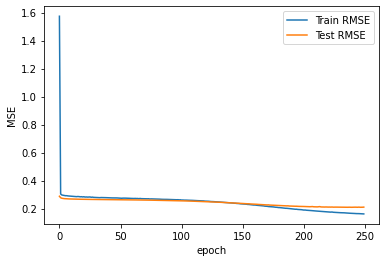

In [66]:
import matplotlib.pyplot as plt
plt.plot(result.history['mse'], label="Train RMSE")
plt.plot(result.history['val_mse'], label="Test RMSE")
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [67]:
model.save('./experiment_no_onehot_add_category_05.h5')